In [1]:
import sys 
sys.path.append("..") 

#from topological_models import generator
import numpy as np
from topology_model import NonHermitianHamiltonian, NonHermitianTopologicalModel
import matplotlib.pyplot as plt
from machine_learning import Cluster
from machine_learning import Classifier
from topology_model import sigma_0, sigma_x, sigma_y, sigma_z
from topology_model import Generator
from topology_model import topology_comparator

In [11]:
class TwistedWinding(NonHermitianHamiltonian):
    def __init__(self, E_ref=0.):
        super().__init__(E_ref)

        self.kappas = None
        self.initiate()

    def get_n(self):
        return 1

    def get_n_dim(self):
        return 1

    def get_parameters(self):
        return self.kappas
    
    def set_parameters(self, **kwargs):
        self.kappas = kwargs['kappa1'], kwargs['kappa2']

    def initiate(self):
        kappa1 = 1.0
        kappa2 = 3*np.random.random()
        self.kappas = kappa1, kappa2

    def get_kpoints(self):
        n_points = 11
        kpoints = [[k] for k in np.linspace(0,np.pi,n_points)]
        return kpoints
    
    def get_Hamiltonian(self, k):
        k = k[0]
        kappa1, kappa2 = self.kappas
        #hk = np.zeros(1, dtype=complex)
        hk = kappa1*np.exp(-1j*k) + kappa1*np.exp(1j*k) + kappa2*np.exp(-2j*k) - self.E_ref
        return hk

    def get_topological_invariant(self):
        kappa1, kappa2 = self.kappas
        if kappa1 > kappa2:
            return -1
        elif kappa1 < kappa2:
            return 1
        else:
            return 0

In [12]:
gap_type = 'point'
E_ref = 1j
generator = Generator(hamiltonian=TwistedWinding(E_ref=E_ref), gap_type=gap_type)

n_sample = 100
#models, vs = generator.generate_models(n_sample)
models, vs = generator.generate_models(n_sample)
n = generator.get_n()

In [22]:
cluster = Cluster(similarity_function=topology_comparator, verbose=False)
center_indices, group_number = cluster.fit(models)
print(group_number)
print("The number of centers: ", len(center_indices))

[37 34 29]
The number of centers:  3


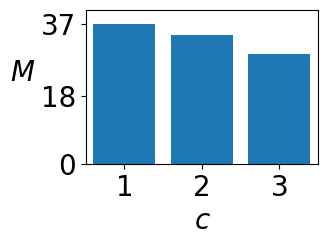

In [23]:
plt.figure(figsize=(3,2))
plt.bar(np.arange(len(group_number))+1, group_number)
plt.xlim([0.5,len(group_number)+0.5])
plt.xticks(list(range(1,len(group_number)+1)),fontsize=20)
plt.ylim([0, np.max(group_number)*1.1])
plt.yticks([0, int(np.max(group_number)/2), int(np.max(group_number))],fontsize=20)
plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.show()

In [24]:
for model in [models[index] for index in center_indices]:
    print(model.get_parameters())

(1.0, 0.25762721244683284)
(1.0, 1.6490427150065412)
(1.0, 2.5252079405531087)


# Phase diagram

In [6]:
# classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
# n1 = 21
# n2 = 21
# kappa1s = np.linspace(0.001,2,n1)
# kappa2s = np.linspace(0.001,2,n2)
# v_list = np.zeros((n1,n2))

# for i in range(n1):
#     for j in range(n2):
#         hamiltonian = TwistedWinding(E_ref=0.)
#         hamiltonian.set_parameters(kappa1=kappa1s[i], kappa2=kappa2s[j])
#         #print(hamiltonian.get_parameters())
#         _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
#             #v_list.append(1)
#             # t1_list.append(t1s[i])
#             # gamma_list.append(gammas[j])
#         v_list[i,j] = classifier.classify(_model)

In [7]:
# plt.figure(figsize=(4,4))
# plt.imshow(v_list)    
# plt.xlabel(r"$J_1$",fontsize=20)
# plt.ylabel(r"$J_2$",fontsize=20,rotation=0,horizontalalignment='right')
# plt.xticks([0, n1/2, n1-1],[r"0", "0.5", r"1"],fontsize=20)
# plt.yticks([0, n2/2, n2-1],[r"0", "0.5", r"1"], fontsize=20)

# # cmap = plt.cm.rainbow
# # norm = matplotlib.colors.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)
# cb = plt.colorbar(ticks=range(len(center_indices)+1), fraction=0.046, pad=0.04)
# cb.ax.tick_params(labelsize=18)
# plt.tight_layout()
# plt.show()

In [25]:
classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
n1 = 51
kappa1 = 1.0
kappa2s = np.linspace(0.001,3,n1)
v_list = np.zeros(n1)

for i in range(n1):
    hamiltonian = TwistedWinding(E_ref=E_ref)
    hamiltonian.set_parameters(kappa1=kappa1, kappa2=kappa2s[i])
    #print(hamiltonian.get_parameters())
    _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
    v_list[i] = classifier.classify(_model)

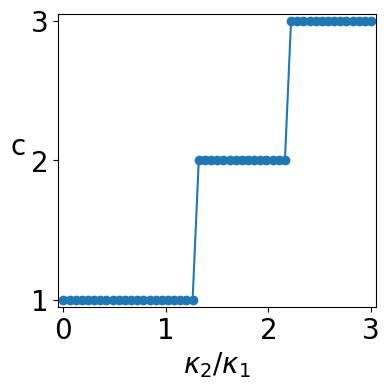

In [28]:
plt.figure(figsize=(4,4))
plt.plot(kappa2s, v_list,'-o')
plt.xticks([0, 1, 2, 3],fontsize=20)
plt.yticks(range(1, len(group_number)+1),fontsize=20)
plt.xlim([-0.05, 3.05])
plt.ylim([1-0.05,len(group_number)+.05])
plt.xlabel(r"$\kappa_2/\kappa_1$",fontsize=20)
plt.ylabel(r"c",fontsize=20,rotation=0,horizontalalignment='right')

plt.tight_layout()
plt.show()

# Save data

In [29]:
from tools import save_data, save_data_M

name = "1D_Twisted_Winding"
save_data(center_indices, group_number, "fig2_{0}_group_number.h5".format(name))
save_data_M(v_list, "fig2_{0}_phase_diagram.h5".format(name))
print(name)

1D_Twisted_Winding
